<a href="https://colab.research.google.com/github/wuziqin/wuziqin/blob/master/LSTM(07_06_21)_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the packages
import math
import statistics 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
!pip install tensorflow


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline



## 1.   Read in the excel file




In [58]:
# loads the raw data 
data = pd.read_csv("/content/NEWDATASET.csv")
data['Date']=pd.to_datetime(data.Date, format='%Y%m', errors='ignore')
data=data[:-1]

data.drop('MyUnknownColumn',axis=1,inplace=True)
data.drop('return',axis=1,inplace=True)
data

,Date,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,return_1
0,1927-02-01 00:00:00,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1,1,1,0.458233
1,1927-03-01 00:00:00,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1,1.035433
2,1927-04-01 00:00:00,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1,5.952800
3,1927-05-01 00:00:00,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1,-2.314500
4,1927-06-01 00:00:00,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1,8.189167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,2018-07-01 00:00:00,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,3.130467
1098,2018-08-01 00:00:00,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,0.344633
1099,2018-09-01 00:00:00,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,-7.018400
1100,2018-10-01 00:00:00,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,1.810500





## 2.   Calculate the 12 predictors






## 4.   Plot the dataset



Text(0.5, 1.0, 'excess return')

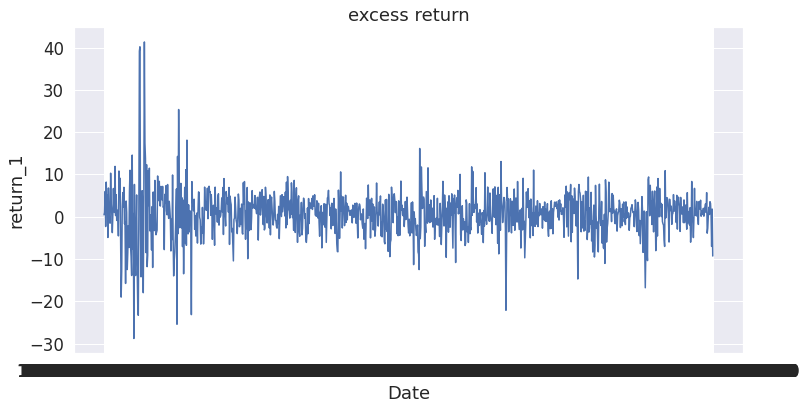

In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data.Date, y=data['return_1'], data=data).set_title("excess return")



## 5.   Separate the features and label



In [61]:
x=data.iloc[:,1:13]
y=data.iloc[:,13]
y = pd.DataFrame(y)

In [62]:
x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06
0,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1,1,1
1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1
2,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1
3,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1
4,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0
1098,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1
1099,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1
1100,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1


In [63]:
y

,return_1
0,0.458233
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500





## 6.   prepare the training dataset and test dataset



In [64]:
#split the training and testing set
train_x=x.iloc[0:900,:]
test_x=x.iloc[900:,:]
train_y=y.iloc[0:900,:]
test_y=y.iloc[900:,:]

In [65]:
train_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06
0,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.18,1.20,-2.95858,-0.40171,1,1,1
1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.11,1.31,1.21951,0.80666,1,1,1
2,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.06,1.25,-0.60241,1.20031,1,1,1
3,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.06,1.30,-1.21212,-2.37215,1,1,1
4,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.27,1.24,-0.61350,0.80993,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
895,-4.191928,-3.604664,19.445156,-1.775833,-0.271667,2.78,1.75,0.00000,-0.12397,0,0,0
896,-4.209781,-3.666160,20.003052,-1.926667,-0.553333,2.90,1.97,-0.07496,-0.38242,0,0,0
897,-4.282180,-3.784187,20.021830,-1.858333,-0.064167,3.66,1.44,-2.25056,-0.43513,0,0,0
898,-4.289641,-3.839448,20.142345,-1.698333,0.141667,4.06,1.02,-0.38373,-0.48993,0,0,0


In [66]:
train_y

,return_1
0,0.458233
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
...,...
895,1.734000
896,7.698700
897,0.749267
898,-1.573233


In [67]:
test_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06
900,-4.253383,-3.802497,16.903434,-1.104167,0.004167,3.900000,0.880000,0.31226,0.63210,0,0,0
901,-4.289675,-3.838442,15.957904,-0.825000,0.376667,4.250000,0.770000,-0.07782,-0.02646,0,0,1
902,-4.219764,-3.747899,15.349211,-0.715833,0.101667,4.030000,1.010000,1.09034,0.81566,0,0,1
903,-4.204157,-3.712336,15.382858,-0.548333,0.145000,4.050000,0.970000,0.77042,0.41297,0,0,0
904,-4.122490,-3.611352,17.077641,-0.429167,0.045000,3.960000,0.970000,0.00000,0.42277,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0
1098,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1
1099,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1
1100,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1


In [68]:
test_y

,return_1
900,3.613033
901,-6.249267
902,-0.923333
903,-7.279067
904,-7.540367
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500


In [69]:
#convert it to np.array
trainx = np.array(train_x)
trainy= np.array(train_y)
testx = np.array(test_x)
testy= np.array(test_y)

In [70]:
#translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(trainx)
X_test = sc.fit_transform(testx)
y_train = sc.fit_transform(trainy)
y_test = sc.fit_transform(testy)

In [71]:
#reshape the dataset to fit the requirement the model
X_train = X_train.reshape((len(X_train), 12, 1))
X_test  = X_test.reshape((len(X_test), 12, 1))

In [72]:
#check the shape of the datasets
X_train.shape

(900, 12, 1)

In [73]:
#check the shape of the datasets
X_test.shape

(202, 12, 1)

In [74]:
#check the shape of the datasets
y_train.shape

(900, 1)

In [75]:
#check the shape of the datasets
y_test.shape

(202, 1)




## 7.   implement the LSTM model



In [76]:
import tensorflow as tf
from tensorflow.keras import layers

In [77]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=15, return_sequences=True,
                  input_shape=(12,1)))
model.add(layers.LSTM(units=15, return_sequences=True,
                  ))
model.add(layers.LSTM(units=15))
model.add(layers.Dense(units=1))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 12, 15)            1020      
_________________________________________________________________
lstm_7 (LSTM)                (None, 12, 15)            1860      
_________________________________________________________________
lstm_8 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4,758
Trainable params: 4,758
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
history = model.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
45/45 [==============================] - 4s 10ms/step - loss: 0.0355
Epoch 2/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 3/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 4/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 5/5
45/45 [==============================] - 0s 9ms/step - loss: 0.0067





## 8.   Visualize the result



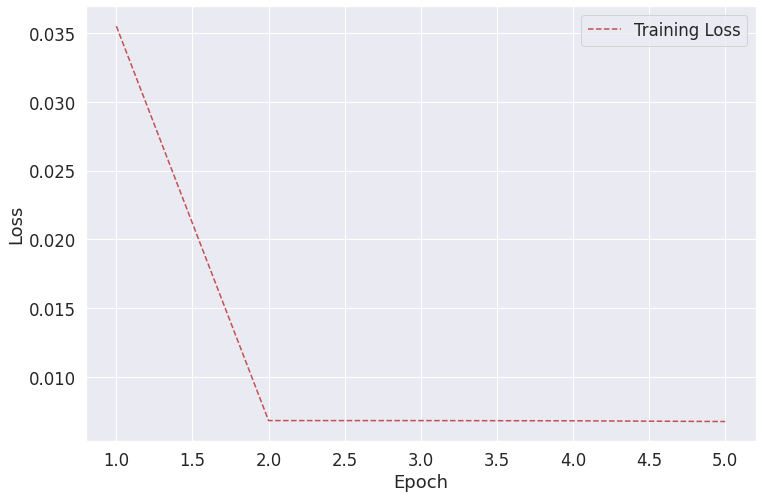

In [80]:
#plot the loss
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

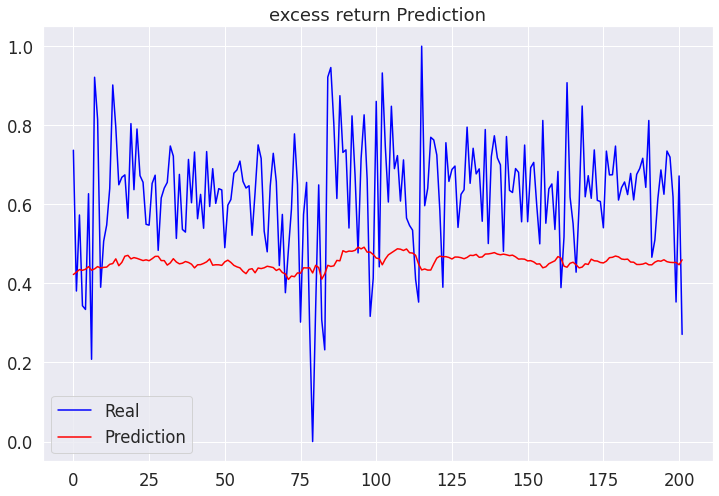

In [81]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('excess return Prediction')
plt.legend()
plt.show()




## 9.   Calculate the R Squared OOS



In [82]:
#define the R2OOS funciton 
def R2OOS(r_real, r_hat, r_bar):
    denominator_res=(r_real-r_bar)**2
    denominator=np.sum(denominator_res)
    numerator_res=(r_real-r_hat)**2
    numerator=np.sum(numerator_res)
    r2oos=1-numerator/denominator   
    return r2oos

In [83]:
#define r_real, r_hat, r_bar
r_real=np.array(test_y).reshape(202)
r_hat=pred.reshape(202)
r_bar=[]

for i in range(899,1101):
  sample=np.array(y[:(i+1)])
  r_bar.append(sample.mean())

r_bar=np.array(r_bar)


In [84]:
print('R2OOS Score: ', R2OOS(r_real, r_hat, r_bar))

R2OOS Score:  0.0022981414523240984


### LSTM model_2
In this section, I use the 12 predictors in both T-1 and T-2 to predict the excess return of T

In [33]:
#import the packages
import math
import statistics 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
!pip install tensorflow


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [34]:
# loads the raw data 
newdata = pd.read_csv("/content/NEWDATASET_1.csv")
newdata['Date']=pd.to_datetime(newdata.Date, format='%Y%m', errors='ignore')
newdata=newdata[:-1]
newdata=newdata[1:]
newdata.drop('MyUnknownColumn',axis=1,inplace=True)
newdata


,Date,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,return,return_1,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
1,1927-03-01 00:00:00,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1,0.458233,1.035433,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1.0,1.0,1.0
2,1927-04-01 00:00:00,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1,1.035433,5.952800,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1.0,1.0,1.0
3,1927-05-01 00:00:00,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1,5.952800,-2.314500,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1.0,1.0,1.0
4,1927-06-01 00:00:00,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1,-2.314500,8.189167,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1.0,1.0,1.0
5,1927-07-01 00:00:00,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.370000,1.270000,0.00000,-0.40171,1,1,1,8.189167,3.085333,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,2018-07-01 00:00:00,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,3.556067,3.130467,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1098,2018-08-01 00:00:00,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,3.130467,0.344633,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1099,2018-09-01 00:00:00,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,0.344633,-7.018400,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1100,2018-10-01 00:00:00,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-7.018400,1.810500,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


Text(0.5, 1.0, 'excess return')

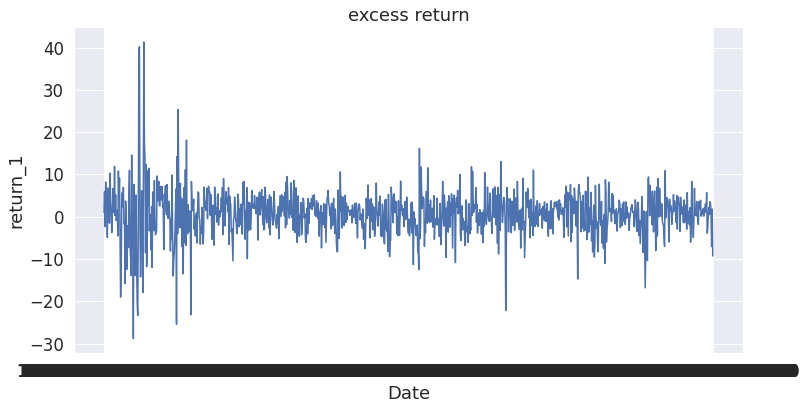

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x=newdata.Date, y=newdata['return_1'], data=newdata).set_title("excess return")

In [36]:
x_1=newdata.iloc[:,:13]
x_2=newdata.iloc[:,15:]
y=newdata.iloc[:,14]
y = pd.DataFrame(y)
date=pd.DataFrame(newdata.iloc[:,0])

x_2 = pd.concat([date,x_2],axis = 1)
x = pd.merge(left=x_1, right=x_2, how='inner',
               left_on='Date', right_on='Date')




In [37]:
x

,Date,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
0,1927-03-01 00:00:00,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1,1,1,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.180000,1.200000,-2.95858,-0.40171,1.0,1.0,1.0
1,1927-04-01 00:00:00,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1,1,1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.110000,1.310000,1.21951,0.80666,1.0,1.0,1.0
2,1927-05-01 00:00:00,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1,1,1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.060000,1.250000,-0.60241,1.20031,1.0,1.0,1.0
3,1927-06-01 00:00:00,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1,1,1,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.060000,1.300000,-1.21212,-2.37215,1.0,1.0,1.0
4,1927-07-01 00:00:00,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.370000,1.270000,0.00000,-0.40171,1,1,1,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.270000,1.240000,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2018-07-01 00:00:00,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1097,2018-08-01 00:00:00,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1098,2018-09-01 00:00:00,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1099,2018-10-01 00:00:00,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


In [38]:
y

,return_1
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
5,3.085333
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500


In [39]:
#split the training and testing set
train_x=x.iloc[0:900,1:]
test_x=x.iloc[900:,1:]
train_y=y.iloc[0:900,:]
test_y=y.iloc[900:,:]

In [40]:
train_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
0,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.11,1.31,1.21951,0.80666,1,1,1,-2.979535,-2.430353,13.803164,0.070000,-0.170000,0.18,1.20,-2.95858,-0.40171,1.0,1.0,1.0
1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.06,1.25,-0.60241,1.20031,1,1,1,-2.976535,-2.445079,11.980268,-0.025000,-0.296667,0.11,1.31,1.21951,0.80666,1.0,1.0,1.0
2,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.06,1.30,-1.21212,-2.37215,1,1,1,-2.984225,-2.471309,11.057640,0.139167,-0.247500,-0.06,1.25,-0.60241,1.20031,1.0,1.0,1.0
3,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.27,1.24,-0.61350,0.80993,1,1,1,-3.025963,-2.531446,12.820695,0.065833,-0.272500,-0.06,1.30,-1.21212,-2.37215,1.0,1.0,1.0
4,-3.061144,-2.603707,13.109773,-0.303333,-0.153333,0.37,1.27,0.00000,-0.40171,1,1,1,-3.007309,-2.531330,11.516150,-0.205833,-0.174167,0.27,1.24,-0.61350,0.80993,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-4.209781,-3.666160,20.003052,-1.926667,-0.553333,2.90,1.97,-0.07496,-0.38242,0,0,0,-4.191928,-3.604664,19.445156,-1.775833,-0.271667,2.78,1.75,0.00000,-0.12397,0.0,0.0,0.0
896,-4.282180,-3.784187,20.021830,-1.858333,-0.064167,3.66,1.44,-2.25056,-0.43513,0,0,0,-4.209781,-3.666160,20.003052,-1.926667,-0.553333,2.90,1.97,-0.07496,-0.38242,0.0,0.0,0.0
897,-4.289641,-3.839448,20.142345,-1.698333,0.141667,4.06,1.02,-0.38373,-0.48993,0,0,0,-4.282180,-3.784187,20.021830,-1.858333,-0.064167,3.66,1.44,-2.25056,-0.43513,0.0,0.0,0.0
898,-4.274156,-3.823617,19.489259,-1.446667,0.075833,4.04,0.86,-1.30971,0.02354,0,0,0,-4.289641,-3.839448,20.142345,-1.698333,0.141667,4.06,1.02,-0.38373,-0.48993,0.0,0.0,0.0


In [41]:
test_x

,dp,ep,vol,bill,bond,term,credit,ppig,ipg,ma0112,ma0312,mom06,dp_lag,ep_lag,vol_lag,bill_lag,bond_lag,term_lag,credit_lag,ppig_lag,ipg_lag,ma0112_lag,ma0312_lag,mom06_lag
900,-4.289675,-3.838442,15.957904,-0.825000,0.376667,4.250000,0.770000,-0.07782,-0.02646,0,0,1,-4.253383,-3.802497,16.903434,-1.104167,0.004167,3.900000,0.880000,0.31226,0.63210,0.0,0.0,0.0
901,-4.219764,-3.747899,15.349211,-0.715833,0.101667,4.030000,1.010000,1.09034,0.81566,0,0,1,-4.289675,-3.838442,15.957904,-0.825000,0.376667,4.250000,0.770000,-0.07782,-0.02646,0.0,0.0,1.0
902,-4.204157,-3.712336,15.382858,-0.548333,0.145000,4.050000,0.970000,0.77042,0.41297,0,0,0,-4.219764,-3.747899,15.349211,-0.715833,0.101667,4.030000,1.010000,1.09034,0.81566,0.0,0.0,1.0
903,-4.122490,-3.611352,17.077641,-0.429167,0.045000,3.960000,0.970000,0.00000,0.42277,0,0,0,-4.204157,-3.712336,15.382858,-0.548333,0.145000,4.050000,0.970000,0.77042,0.41297,0.0,0.0,0.0
904,-4.045200,-3.488749,19.417406,-0.296667,-0.160833,3.760000,1.090000,0.07645,0.95153,0,0,0,-4.122490,-3.611352,17.077641,-0.429167,0.045000,3.960000,0.970000,0.00000,0.42277,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1,1,0,-3.976152,-3.099840,9.597485,0.489167,0.210356,1.012381,1.047619,1.44783,-0.79318,1.0,1.0,1.0
1097,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1,1,1,-3.985434,-3.072646,10.192575,0.475000,0.164603,0.929048,0.980952,0.49213,0.75146,1.0,1.0,0.0
1098,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1,1,1,-4.015248,-3.102460,11.303303,0.460000,0.125591,0.859130,0.990870,0.04897,0.44494,1.0,1.0,1.0
1099,-3.921036,-3.019594,12.364790,0.490000,0.309026,0.902273,0.987727,0.09833,0.13723,0,1,1,-4.019533,-3.106745,10.763786,0.468333,0.206154,0.874211,0.975789,-0.44053,0.80311,1.0,1.0,1.0


In [42]:
train_y

,return_1
1,1.035433
2,5.952800
3,-2.314500
4,8.189167
5,3.085333
...,...
896,7.698700
897,0.749267
898,-1.573233
899,-2.085600


In [43]:
test_y

,return_1
901,-6.249267
902,-0.923333
903,-7.279067
904,-7.540367
905,0.566100
...,...
1097,3.130467
1098,0.344633
1099,-7.018400
1100,1.810500


In [44]:
#convert it to np.array
trainx = np.array(train_x)
trainy= np.array(train_y)
testx = np.array(test_x)
testy= np.array(test_y)

In [45]:
#translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(trainx)
X_test = sc.fit_transform(testx)
y_train = sc.fit_transform(trainy)
y_test = sc.fit_transform(testy)

In [46]:
#reshape the dataset to fit the requirement the model
X_train = X_train.reshape((len(X_train), 24, 1))
X_test  = X_test.reshape((len(X_test), 24, 1))

In [47]:
import tensorflow as tf
from tensorflow.keras import layers

In [48]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=15, return_sequences=True,
                  input_shape=(24,1)))
model.add(layers.LSTM(units=15, return_sequences=True,
                  ))
model.add(layers.LSTM(units=15))
model.add(layers.Dense(units=1))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 15)            1020      
_________________________________________________________________
lstm_4 (LSTM)                (None, 24, 15)            1860      
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4,758
Trainable params: 4,758
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
history = model.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
45/45 [==============================] - 5s 15ms/step - loss: 0.0357
Epoch 2/5
45/45 [==============================] - 1s 15ms/step - loss: 0.0073
Epoch 3/5
45/45 [==============================] - 1s 15ms/step - loss: 0.0070
Epoch 4/5
45/45 [==============================] - 1s 19ms/step - loss: 0.0069
Epoch 5/5
45/45 [==============================] - 1s 17ms/step - loss: 0.0068


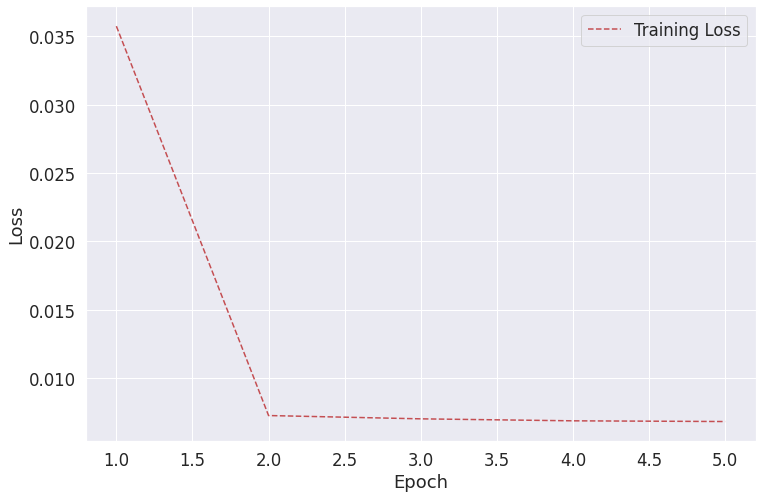

In [51]:
#plot the loss
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

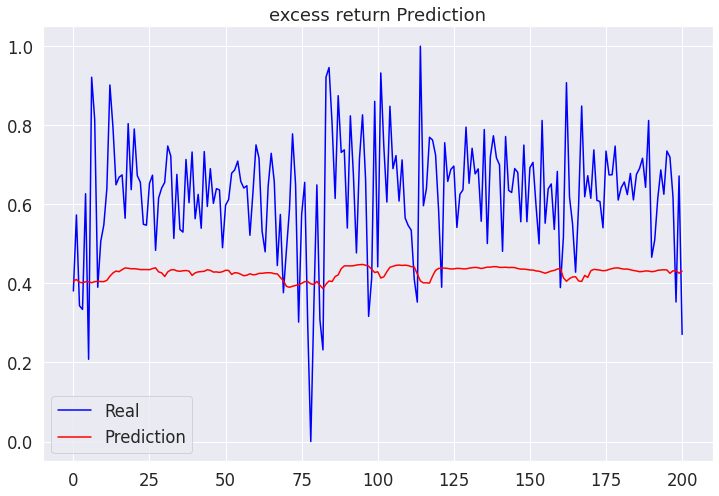

In [52]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('excess return Prediction')
plt.legend()
plt.show()

In [53]:
#define the R2OOS funciton 
def R2OOS(r_real, r_hat, r_bar):
    denominator_res=(r_real-r_bar)**2
    denominator=np.sum(denominator_res)
    numerator_res=(r_real-r_hat)**2
    numerator=np.sum(numerator_res)
    r2oos=1-numerator/denominator   
    return r2oos

In [54]:
#define r_real, r_hat, r_bar
r_real=np.array(test_y).reshape(201)
r_hat=pred.reshape(201)
r_bar=[]

for i in range(899,1100):
  sample=np.array(y[:(i+1)])
  r_bar.append(sample.mean())

r_bar=np.array(r_bar)

In [55]:
print('R2OOS Score: ', R2OOS(r_real, r_hat, r_bar))

R2OOS Score:  0.0020453390856559617
